# Table of Contents

1. Importing Libraries
2. Import Dataframe Cleaned_data.xlsx
3. check for data consistency and correctness 
4. Perform Descriptive Analysis
5. Clickout Ratio
6. Additional KPIs

# 1 Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# 2. Import Data

In [2]:
path = r'C:\Users\admin\Desktop\Data Analyst Case Study'

In [3]:
path

'C:\\Users\\admin\\Desktop\\Data Analyst Case Study'

In [4]:
# Read the excel file 'Cleaned_Data from the specified path

df_split = pd.read_excel(os.path.join(path, 'Data', 'Prepared Data', 'cleaned_Data.xlsx'), index_col = False)

# 3. Check for Data Consistency and Correctness

In [5]:
df_split.head(5)

,Unnamed: 0,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day
0,5,2022-06-18,2022061819050074027,III5DT3FFI,ru,0,0,2,Russia,18,1,0,154,2100,0,2022-06-23,2022-06-24
1,7,2022-05-23,2022052312665009565,X7L34ZN7VH,tw,0,0,2,Taiwan,2,1,0,36,2100,4,2022-06-05,2022-06-06
2,11,2022-05-12,2022051216075016751,0OCXTTSXOL,ru,0,0,2,Russian Federation,20,2,0,283,2114,0,2022-05-17,2022-05-18
3,15,2022-06-10,2022061011089010517,Q4AR3V1LWC,uk,0,0,2,United Kingdom,2,2,0,221,2100,5,2022-07-07,2022-07-08
4,16,2022-06-05,2022060518052078255,805I4VX05W,fr,0,0,2,France,20,1,0,376,2100,93,2022-06-23,2022-06-24


In [6]:
# drop some columns

df_split.drop(columns={'Unnamed: 0'}, inplace=True)


# change platform to uppercase 
df_split['platform'] = df_split['platform'].str.upper().str.strip()

In [7]:
df_split.head(5)

,ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day
0,2022-06-18,2022061819050074027,III5DT3FFI,RU,0,0,2,Russia,18,1,0,154,2100,0,2022-06-23,2022-06-24
1,2022-05-23,2022052312665009565,X7L34ZN7VH,TW,0,0,2,Taiwan,2,1,0,36,2100,4,2022-06-05,2022-06-06
2,2022-05-12,2022051216075016751,0OCXTTSXOL,RU,0,0,2,Russian Federation,20,2,0,283,2114,0,2022-05-17,2022-05-18
3,2022-06-10,2022061011089010517,Q4AR3V1LWC,UK,0,0,2,United Kingdom,2,2,0,221,2100,5,2022-07-07,2022-07-08
4,2022-06-05,2022060518052078255,805I4VX05W,FR,0,0,2,France,20,1,0,376,2100,93,2022-06-23,2022-06-24


# 4. Perform Descriptive Statistics

In [8]:
# Descriptive statistics
print(df_split.describe())  # Summary of numerical columns
print(df_split['platform'].value_counts())  # Frequency of platforms
print(df_split['traffic_type'].value_counts())  # Frequency of traffic types

                                 ymd    session_id    is_app    is_repeater  \
count                         254177  2.541770e+05  254177.0  254177.000000   
mean   2022-05-30 19:26:51.407798528  2.022056e+18       0.0       0.431648   
min              2022-05-01 00:00:00  2.022050e+18       0.0       0.000000   
25%              2022-05-15 00:00:00  2.022052e+18       0.0       0.000000   
50%              2022-05-31 00:00:00  2.022053e+18       0.0       0.000000   
75%              2022-06-15 00:00:00  2.022062e+18       0.0       1.000000   
max              2022-06-30 00:00:00  2.022063e+18       0.0       1.000000   
std                              NaN  5.062950e+12       0.0       0.495307   

        traffic_type       agent_id      clickouts       bookings  \
count  254177.000000  254177.000000  254177.000000  254177.000000   
mean        4.730562      15.212974       1.581587       0.016150   
min         2.000000       2.000000       1.000000       0.000000   
25%         

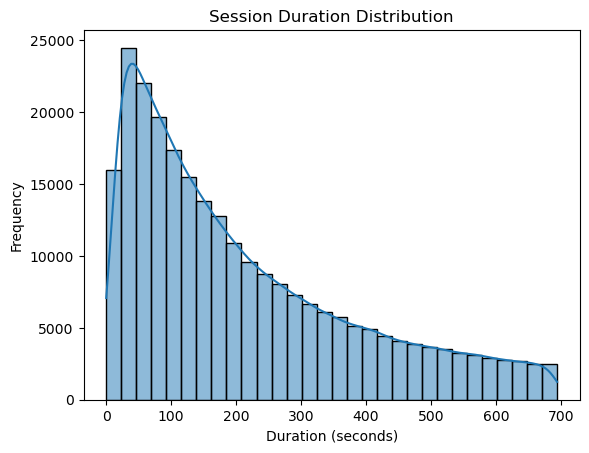

In [9]:
# Visualizations
sns.histplot(df_split['session_duration'], bins=30, kde=True)
plt.title("Session Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

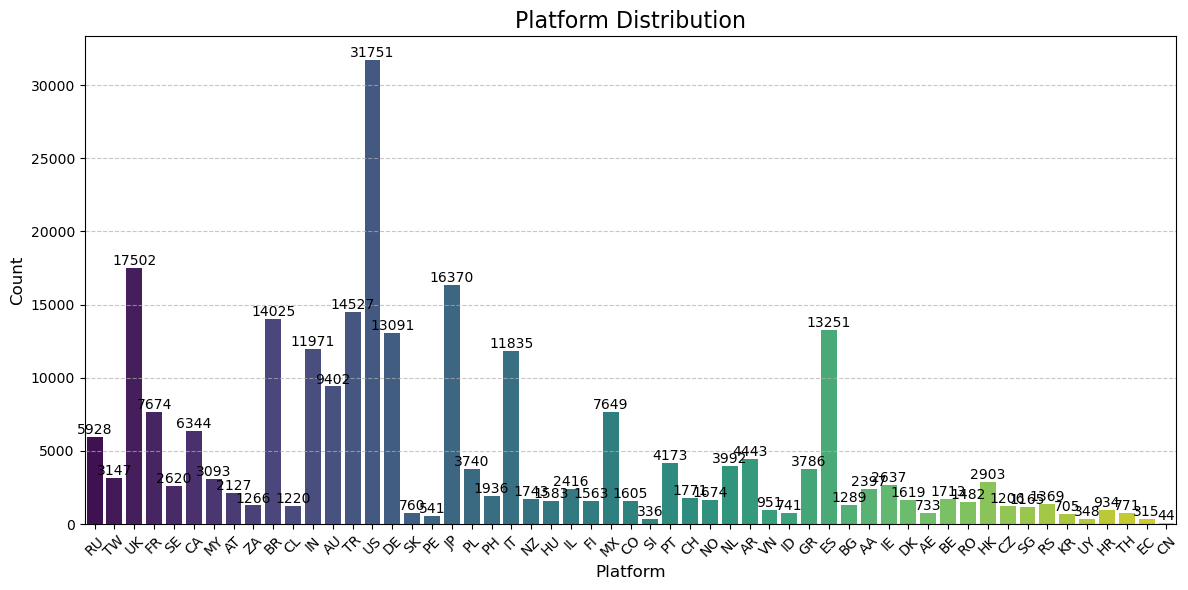

In [10]:
# data is in `df_split` and the column is `platform`

# 1. Rotate x-axis labels
plt.figure(figsize=(12, 6))  # Adjust figure size
ax = sns.countplot(x='platform', data=df_split, palette='viridis')
plt.title("Platform Distribution", fontsize=16)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45) 

# 2. Annotate bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# 3. Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the improved chart
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Platform')

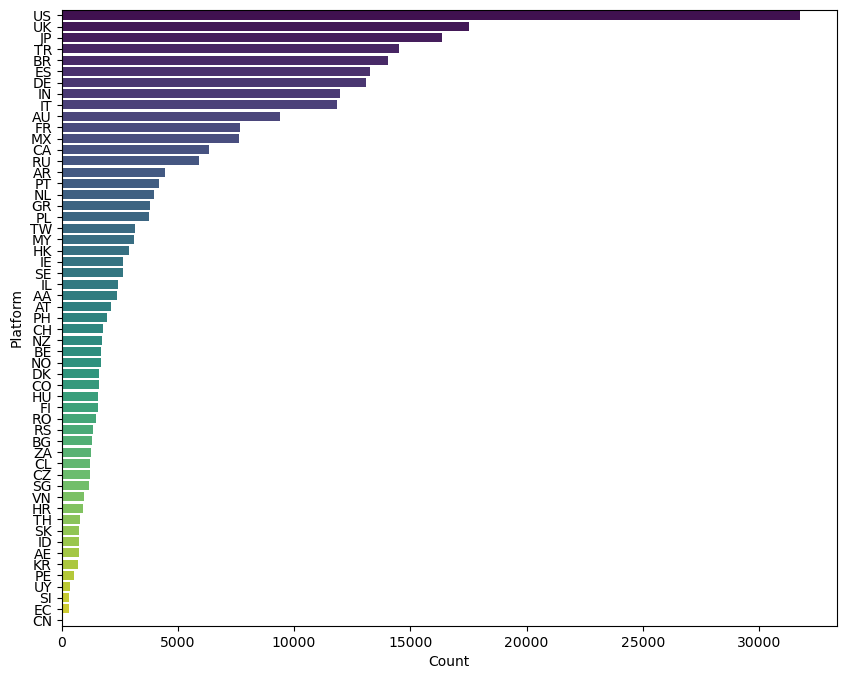

In [11]:
# To make data more horizontal

plt.figure(figsize=(10, 8))
ax = sns.countplot(y='platform', data=df_split, order=df_split['platform'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Platform")


<Axes: xlabel='platform', ylabel='count'>

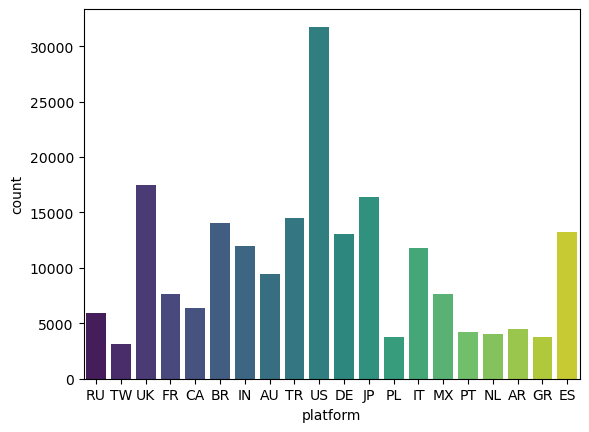

In [12]:
# Configure to only list top 20 platforms

top_platforms = df_split['platform'].value_counts().head(20).index
df_top = df_split[df_split['platform'].isin(top_platforms)]
sns.countplot(x='platform', data=df_top, palette='viridis')


# 5. Click out Ratio

In [13]:
# Overall COR
overall_cor = df_split['clickouts'].sum() / df_split['session_id'].nunique()
print("Overall Clickout Ratio:", overall_cor)



Overall Clickout Ratio: 1.581586846960976


In [14]:
# COR by platform
cor_platform = df_split.groupby('platform').agg({'clickouts': 'sum', 'session_id': 'nunique'})
cor_platform['COR'] = cor_platform['clickouts'] / cor_platform['session_id']
print(cor_platform)

          clickouts  session_id       COR
platform                                 
AA             3655        2397  1.524823
AE             1164         733  1.587995
AR             6757        4443  1.520819
AT             3341        2127  1.570757
AU            14788        9402  1.572857
BE             2751        1713  1.605954
BG             1941        1289  1.505818
BR            21520       14025  1.534403
CA             9696        6344  1.528373
CH             2790        1771  1.575381
CL             1916        1220  1.570492
CN               58          44  1.318182
CO             2506        1605  1.561371
CZ             1811        1206  1.501658
DE            21180       13091  1.617905
DK             2549        1619  1.574429
EC              463         315  1.469841
ES            21457       13251  1.619274
FI             2350        1563  1.503519
FR            12000        7674  1.563722
GR             5968        3786  1.576334
HK             4511        2903  1

In [15]:
# COR by device type
cor_device = df_split.groupby('agent_id').agg({'clickouts': 'sum', 'session_id': 'nunique'})
cor_device['COR'] = cor_device['clickouts'] / cor_device['session_id']
print(cor_device)

          clickouts  session_id       COR
agent_id                                 
2             75956       47265  1.607024
4             16473       10212  1.613102
12            17847       11866  1.504045
14             7441        4553  1.634307
16            24086       15484  1.555541
18            84423       54810  1.540285
20           154102       96032  1.604694
22             1350         805  1.677019
24              729         517  1.410058
26            10592        6765  1.565706
28             9004        5868  1.534424


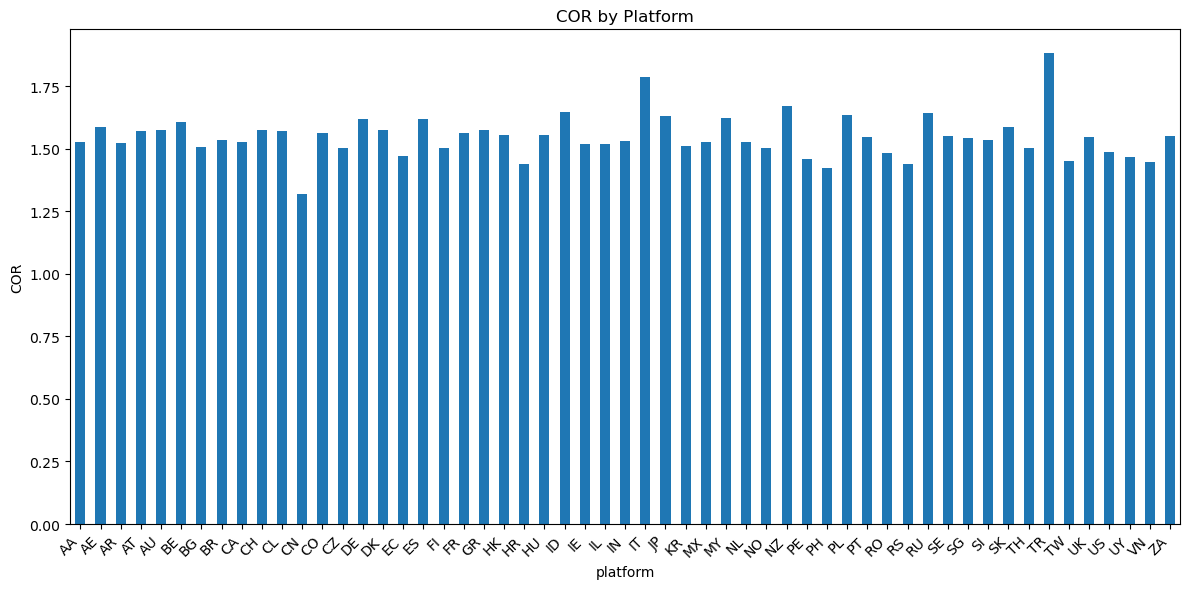

In [16]:
# Visualizations

cor_platform['COR'].plot(kind='bar', title='COR by Platform', ylabel='COR', figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()


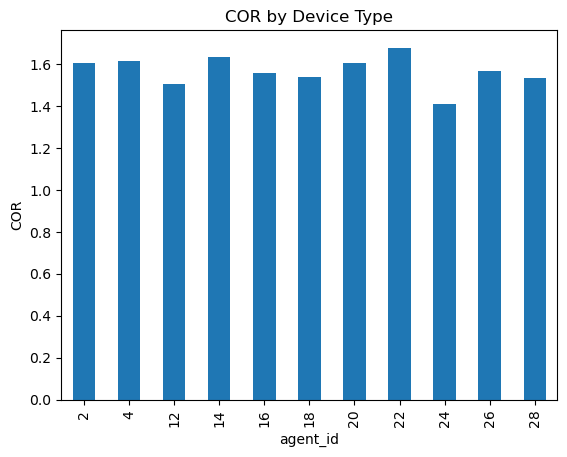

In [17]:
cor_device['COR'].plot(kind='bar', title='COR by Device Type', ylabel='COR')
plt.show()

# 6 Additional KPIs

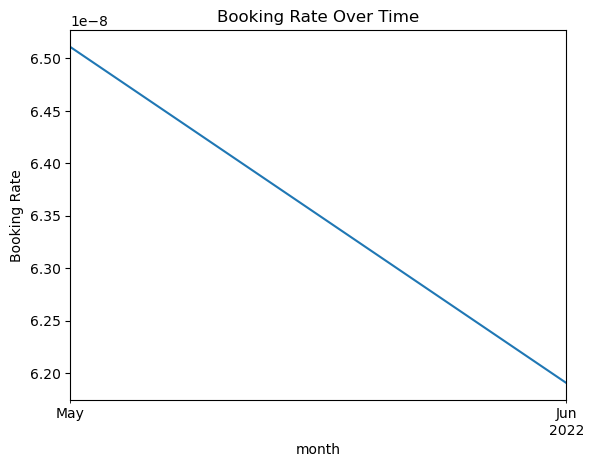

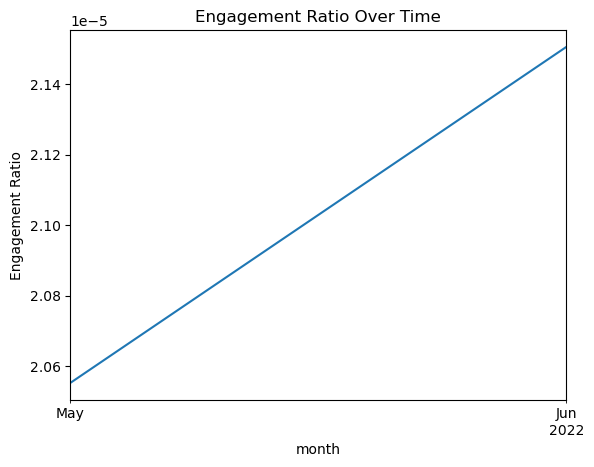

In [18]:
# Booking Rate
df_split['Booking_Rate'] = df_split['bookings'] / df_split['session_id'].nunique()

# Engagement Ratio
df_split['Engagement_Ratio'] = df_split['total_ctp'] / df_split['session_id'].nunique()

# Trends over time
df_split['ymd'] = pd.to_datetime(df_split['ymd'])
df_split['month'] = df_split['ymd'].dt.to_period('M')

booking_trend = df_split.groupby('month')['Booking_Rate'].mean()
engagement_trend = df_split.groupby('month')['Engagement_Ratio'].mean()

# Visualizations
booking_trend.plot(kind='line', title='Booking Rate Over Time', ylabel='Booking Rate')
plt.show()

engagement_trend.plot(kind='line', title='Engagement Ratio Over Time', ylabel='Engagement Ratio')
plt.show()


              clickouts  session_id       COR
traffic_type                                 
2                160959       94331  1.706321
4                 51775       33708  1.535986
6                109782       68958  1.592013
8                 73874       53321  1.385458
10                 5613        3859  1.454522


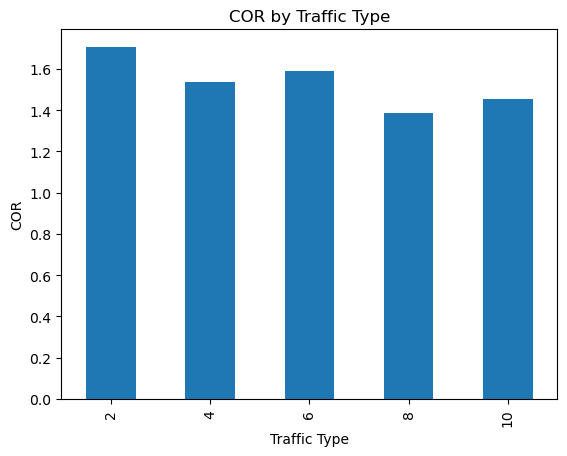

Traffic Types with High COR:
              clickouts  session_id       COR
traffic_type                                 
2                160959       94331  1.706321
4                 51775       33708  1.535986
6                109782       68958  1.592013
Traffic Types with Low COR:
              clickouts  session_id       COR
traffic_type                                 
8                 73874       53321  1.385458
10                 5613        3859  1.454522


In [19]:
# Calculate COR by traffic type
cor_traffic = df_split.groupby('traffic_type').agg({'clickouts': 'sum', 'session_id': 'nunique'})
cor_traffic['COR'] = cor_traffic['clickouts'] / cor_traffic['session_id']
print(cor_traffic)

# Visualize COR by traffic type
cor_traffic['COR'].plot(kind='bar', title='COR by Traffic Type', ylabel='COR', xlabel='Traffic Type')
plt.show()

# Analyze Results
print("Traffic Types with High COR:")
print(cor_traffic[cor_traffic['COR'] > cor_traffic['COR'].mean()])

print("Traffic Types with Low COR:")
print(cor_traffic[cor_traffic['COR'] < cor_traffic['COR'].mean()])
